In [1]:
import os
import numpy as np

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix



import cv2
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt

import Data_preparation as DP
DP = DP.Data_preparation()


from sklearn.preprocessing import LabelEncoder
import numpy as np

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the Data 

In [2]:
Images,Labels = DP.create_Image_dataset("Meine_Bilder/",100,100)

print(Labels[0])


Dosenoeffner


In [3]:
Images_train,Images_test,Labels_train,Labels_test= DP.split_Image_data(Images,Labels,0.8)

In [4]:
Images_train=np.asarray(Images_train)
Images_train[0].shape

(100, 100)

In [5]:
print("Shape Trainingsdaten: {}".format(Images_train.shape))
print("Shape Testdaten: {}".format(Images_test.shape))
print("Dimension Bild Nr. 5: {}".format(Images_train[5].shape))
print("Label zu Bild Nr. 5 {}".format(Labels_train[5]))
cv2.namedWindow("open33", cv2.WINDOW_NORMAL)
cv2.imshow('open33',Images[10])
cv2.waitKey()
cv2.destroyAllWindows()

Shape Trainingsdaten: (67, 100, 100)
Shape Testdaten: (17, 100, 100)
Dimension Bild Nr. 5: (100, 100)
Label zu Bild Nr. 5 Dosenoeffner


In [6]:
len_Test_data=len(Images_test)
len_Train_data=len(Images_train)


train_images = Images_train.reshape(len_Train_data, 100, 100, 1)
train_images = train_images.astype('float32')
train_images /= 255

test_images = Images_test.reshape(len_Test_data, 100, 100, 1)
test_images = test_images.astype('float32')
test_images /= 255



"""
for i in range(len(Labels_train)):
    if Labels_train[i]=="Dosenoeffner":
        Labels_train[i]=0
    elif Labels_train[i]=="Flaschenoeffner":
        Labels_train[i]=1
    else:
        Labels_train[i]=="Korkenzieher"
        Labels_train[i]=2

for i in range(len(Labels_test)):
    if Labels_test[i]=="Dosenoeffner":
        Labels_test[i]=0
    elif Labels_test[i]=="Flaschenoeffner":
        Labels_test[i]=1
    else:
        Labels_test[i]=="Korkenzieher"
        Labels_test[i]=2
"""       
Labels_test=np.array(Labels_test)
Labels_train=np.array(Labels_train)
label_encoder=LabelEncoder()
Labels_test=label_encoder.fit_transform(Labels_test)
Labels_train=label_encoder.fit_transform(Labels_train)

Labels_train=to_categorical(Labels_train)
Labels_test=to_categorical(Labels_test)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]


In [7]:
print("Trainingsdatensatz:{}".format(train_images.shape))
print("Testdatensatz:{}".format(test_images.shape))

print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages, NrTestimages))

Trainingsdatensatz:(67, 100, 100, 1)
Testdatensatz:(17, 100, 100, 1)
Wir haben 67 Trainingsbilder und 17 Testbilder.


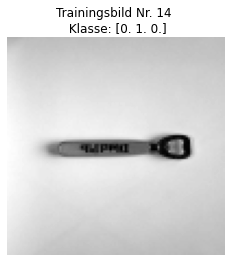

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

randindex = random.randint(0,len_Train_data)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex,Labels_train[randindex])
plt.imshow(train_images[randindex].reshape(100,100), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()


In [9]:
# Die Netzwerkarchitektur
model = Sequential()

# Das Format der Eingabedaten wird an das erste Layer übergeben
mnist_inputshape = train_images.shape[1:4]

# Kodierungsblock
model.add(Conv2D(32, kernel_size=(5,5), 
      activation = 'relu',
      input_shape=mnist_inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))
# Conv_Block 2
model.add(Conv2D(64, kernel_size=(5,5),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Prädiktionssblock
model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 flatten (Flatten)           (None, 30976)             0

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [11]:
# TensorBoard - Vorbereitung
LOGDIR = "logs" # hier das eigene Verzeichnis angeben
my_tensorboard = TensorBoard(log_dir = LOGDIR,
      histogram_freq=0,
      write_graph=True,
      write_images=True)
# Hyperparameter
my_batch_size = 128
my_num_classes = 3
my_epochs = 5

history = model.fit(train_images, Labels_train,
      batch_size=my_batch_size,
      callbacks=[my_tensorboard],
      epochs=my_epochs,
      use_multiprocessing=False,
      verbose=1,
      validation_data=(test_images, Labels_test))


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 1.0986 - accuracy: 0.2239 - val_loss: 1.0903 - val_accuracy: 0.7059
Epoch 2/5
1/1 [==============================] - 0s 427ms/step - loss: 1.0920 - accuracy: 0.6418 - val_loss: 1.0491 - val_accuracy: 0.7059
Epoch 3/5
1/1 [==============================] - 0s 410ms/step - loss: 1.0576 - accuracy: 0.6418 - val_loss: 0.9654 - val_accuracy: 0.7059
Epoch 4/5
1/1 [==============================] - 0s 438ms/step - loss: 0.9938 - accuracy: 0.6418 - val_loss: 0.8612 - val_accuracy: 0.7059
Epoch 5/5
1/1 [==============================] - 0s 407ms/step - loss: 0.8988 - accuracy: 0.6418 - val_loss: 0.8489 - val_accuracy: 0.7059


In [84]:
score = model.evaluate(test_images, Labels_test)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])

1/1 [==============================] - 0s 36ms/step - loss: 0.7084 - accuracy: 0.7647
Test Verlust: 0.7084380984306335
Test Genauigkeit: 0.7647058963775635


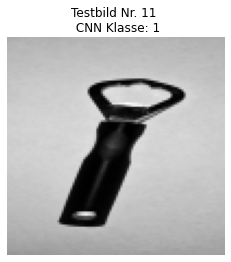

In [13]:
prediction = model.predict(Images_test)
randindex = random.randint(0,len(Images_test))
# Die Funktion argmax() liefert uns den index des höchsten Werts des Ergebnisvektors
CNN = prediction[randindex].argmax()
plttitle = "Testbild Nr. {} \n CNN Klasse: {}".format(randindex,CNN)
plt.imshow(test_images[randindex].reshape(100,100), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()

In [86]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


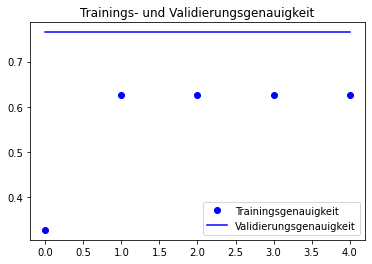

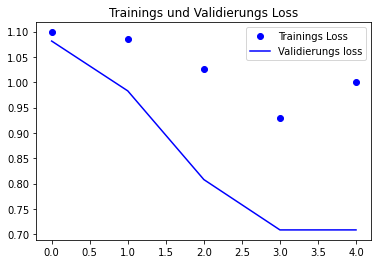

In [87]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Trainings Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs loss')
plt.title('Trainings und Validierungs Loss')
plt.legend()

plt.show()

In [18]:
#print(classification_report(prediction,Labels_test))